<a href="https://colab.research.google.com/github/Groot81/Heart-Disease-Diagnostic-Analysis/blob/main/Heart_Disease_Diagnostic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  #visualizing data
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Heart Disease data.csv') #upload csv file
df.shape

(1025, 14)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# **Data Cleaning**

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
# Mapping for numerical to categorical conversion
sex_mapping = {0: 'female', 1: 'male'}
df['sex'] = df['sex'].map(sex_mapping).astype('object')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,male,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,male,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,male,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,male,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,female,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
pd.isnull(df).sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.index

RangeIndex(start=0, stop=1025, step=1)

In [ ]:
df.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# Calculate mean, median, and standard deviation of age
mean_age = df['age'].mean()
median_age = df['age'].median()
std_age = df['age'].std()

# Display the summary statistics
print("Summary Statistics of Age:")
print(f"Mean Age: {mean_age:.2f}")
print(f"Median Age: {median_age}")
print(f"Standard Deviation of Age: {std_age:.2f}")


Summary Statistics of Age:
Mean Age: 54.43
Median Age: 56.0
Standard Deviation of Age: 9.07


# **Exploratory Data Analysis**

In [ ]:
# Calculate Heart Disease Rates
total_cases = len(df)
heart_disease_cases = df['target'].sum()
heart_disease_rate = (heart_disease_cases / total_cases) * 100

print(f"Overall Heart Disease Rate: {heart_disease_rate:.2f}%")

Overall Heart Disease Rate: 51.32%


In [ ]:
# Calculate Heart Disease by Gender
heart_disease_by_gender = df.groupby('sex')['target'].mean() * 100

print("\nHeart Disease Rates by Gender:")
print(heart_disease_by_gender)


Heart Disease Rates by Gender:
sex
female    72.435897
male      42.075736
Name: target, dtype: float64


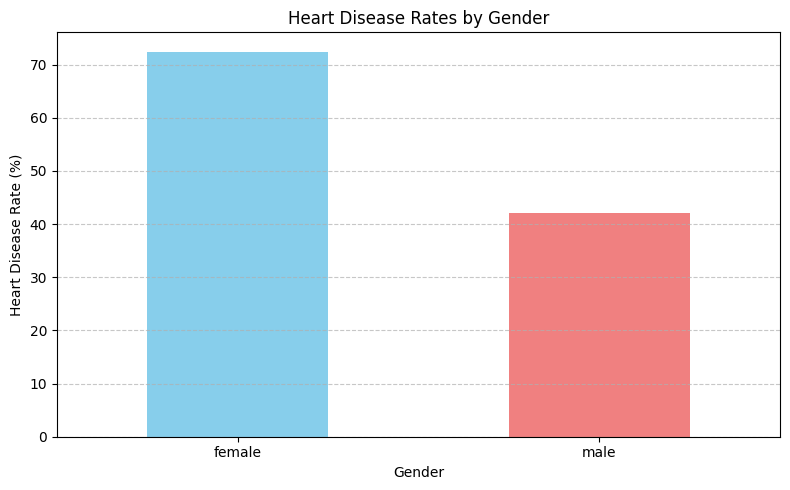

In [ ]:
# Plot Heart Disease by Gender
plt.figure(figsize=(8, 5))
heart_disease_by_gender.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Heart Disease Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Heart Disease Rate (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate Heart Disease by Age
# Define age groups
bins = [20, 40, 60, 80, 100]
labels = ['20-39', '40-59', '60-79', '80-99']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

heart_disease_by_age = df.groupby('age_group')['target'].mean() * 100

print("\nHeart Disease Rates by Age Group:")
print(heart_disease_by_age)


Heart Disease Rates by Age Group:
age_group
20-39    73.684211
40-59    55.083460
60-79    39.158576
80-99          NaN
Name: target, dtype: float64


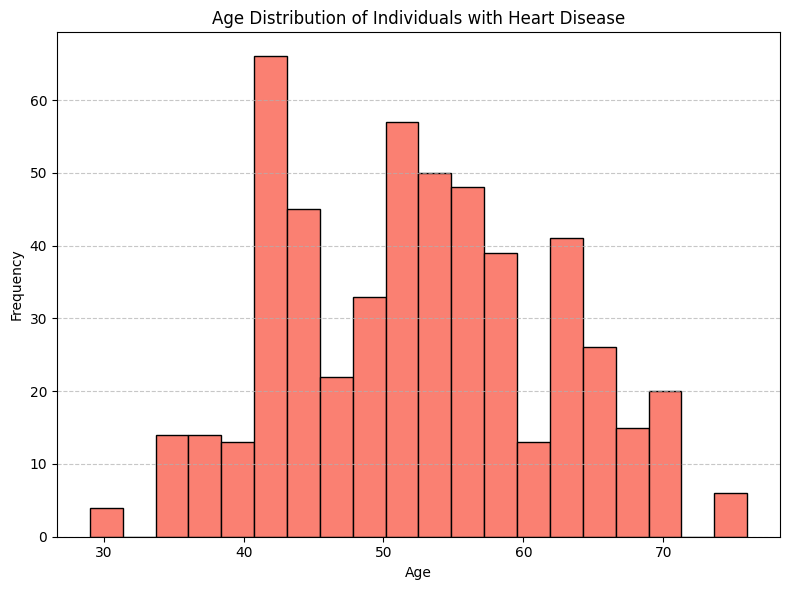

In [ ]:
# Plot histogram of Age distribution among individuals with heart disease
plt.figure(figsize=(8, 6))
plt.hist(df[df['target'] == 1]['age'], bins=20, color='salmon', edgecolor='black')
plt.title('Age Distribution of Individuals with Heart Disease')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Summary Statistics
summary_stats = df.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
               age           cp     trestbps        chol          fbs  \
count  1025.000000  1025.000000  1025.000000  1025.00000  1025.000000   
mean     54.434146     0.942439   131.611707   246.00000     0.149268   
std       9.072290     1.029641    17.516718    51.59251     0.356527   
min      29.000000     0.000000    94.000000   126.00000     0.000000   
25%      48.000000     0.000000   120.000000   211.00000     0.000000   
50%      56.000000     1.000000   130.000000   240.00000     0.000000   
75%      61.000000     2.000000   140.000000   275.00000     0.000000   
max      77.000000     3.000000   200.000000   564.00000     1.000000   

           restecg      thalach        exang      oldpeak        slope  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.529756   149.114146     0.336585     1.071512     1.385366   
std       0.527878    23.005724     0.472772     1.175053     0.617755   
min       0.000000    71.0

<ipython-input-43-85375670c0c1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


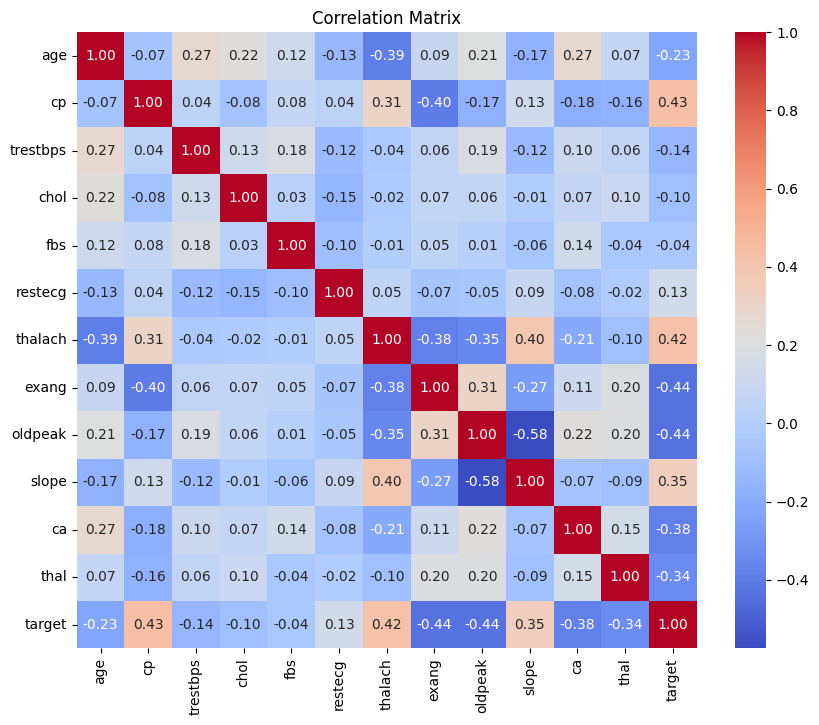

In [ ]:
# Correlation Analysis
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

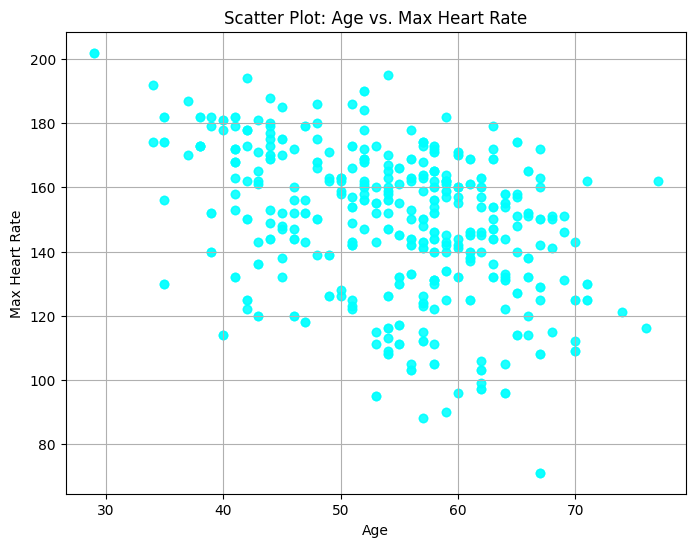

In [ ]:
#Comparing 'age' and 'thalach' using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['thalach'], color='cyan', alpha=0.5)
plt.title('Scatter Plot: Age vs. Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.grid(True)
plt.show()

<ipython-input-48-aad554238f32>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=attribute, palette='Set2')
<ipython-input-48-aad554238f32>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=attribute, palette='Set2')
<ipython-input-48-aad554238f32>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=attribute, palette='Set2')
<ipython-input-48-aad554238f32>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `le

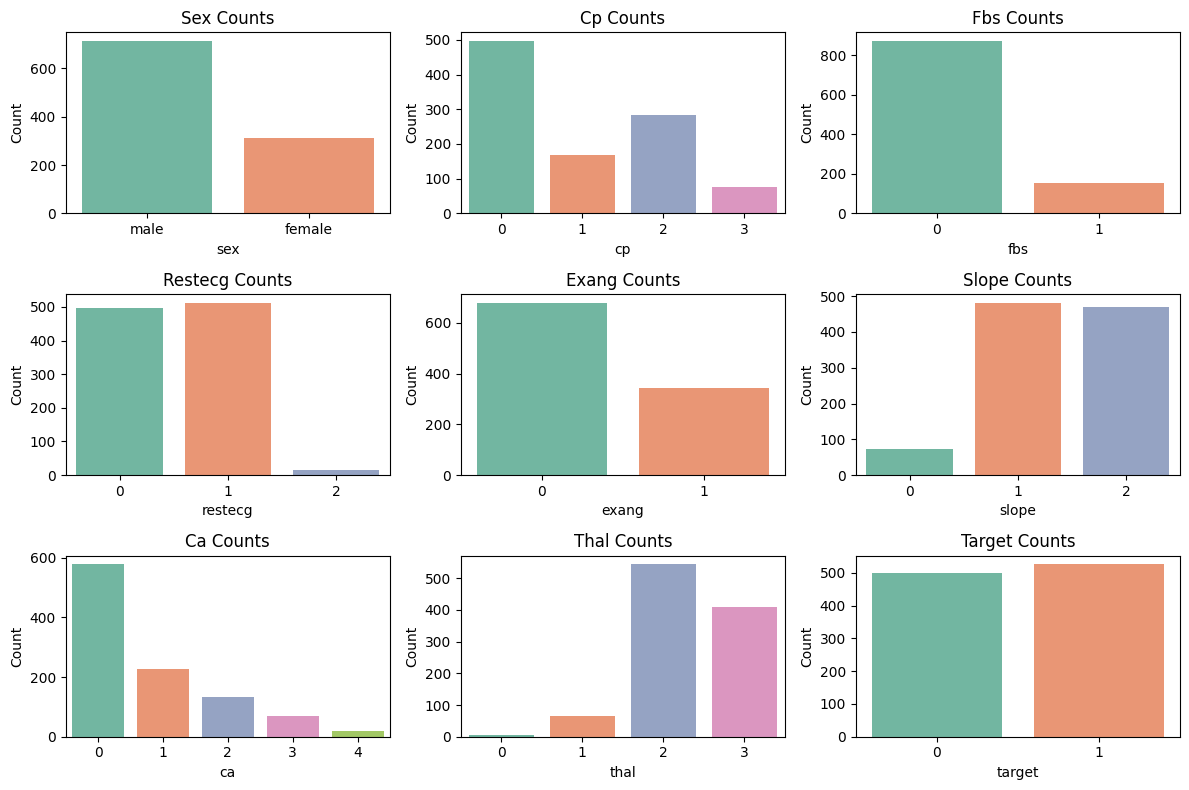

In [ ]:
# Plot bar charts for categorical attributes
categorical_attributes = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
plt.figure(figsize=(12, 8))
for i, attribute in enumerate(categorical_attributes, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=attribute, palette='Set2')
    plt.title(attribute.capitalize() + ' Counts')
    plt.xlabel(attribute)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

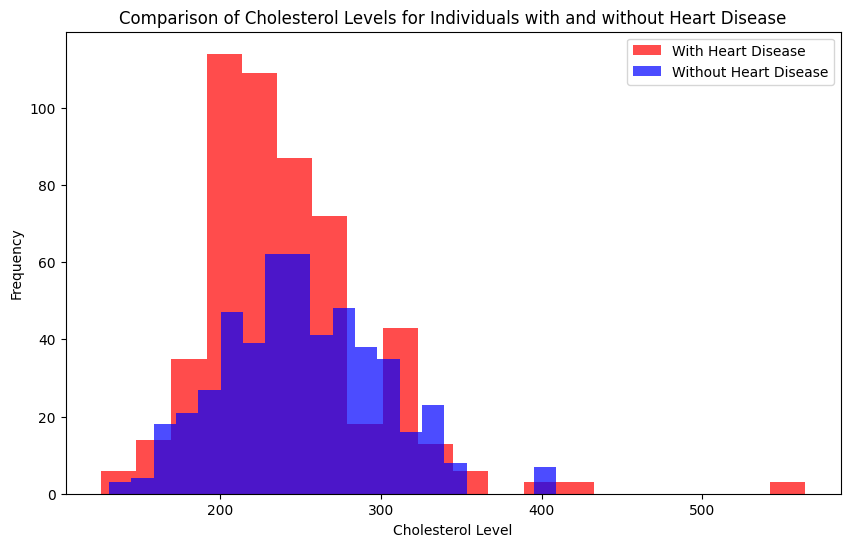

In [ ]:
#How does the distribution of cholesterol levels (chol) vary among individuals with and without heart disease?
# Filter data for individuals with and without heart disease
with_heart_disease = df[df['target'] == 1]
without_heart_disease = df[df['target'] == 0]

# Plot histograms for cholesterol levels for both groups
plt.figure(figsize=(10, 6))

# Histogram for individuals with heart disease
plt.hist(with_heart_disease['chol'], bins=20, color='red', alpha=0.7, label='With Heart Disease')

# Histogram for individuals without heart disease
plt.hist(without_heart_disease['chol'], bins=20, color='blue', alpha=0.7, label='Without Heart Disease')

# Add labels and title
plt.title('Comparison of Cholesterol Levels for Individuals with and without Heart Disease')
plt.xlabel('Cholesterol Level')
plt.ylabel('Frequency')
plt.legend()

# Show plot
plt.show()

<ipython-input-52-9eac56878304>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proportion_with_heart_disease_by_cp.index, y=proportion_with_heart_disease_by_cp.values, palette='viridis')


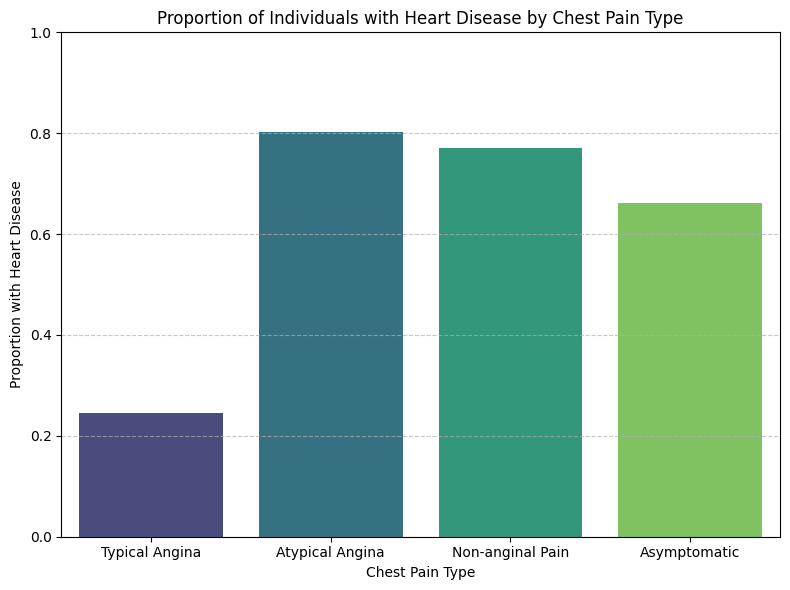

In [ ]:
#How do chest pain types (cp) relate to the presence of heart disease?
# Calculate the proportion of individuals with heart disease for each chest pain type
proportion_with_heart_disease_by_cp = df.groupby('cp')['target'].mean()

# Visualize the relationship between chest pain types and heart disease using a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=proportion_with_heart_disease_by_cp.index, y=proportion_with_heart_disease_by_cp.values, palette='viridis')
plt.title('Proportion of Individuals with Heart Disease by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Proportion with Heart Disease')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])
plt.ylim(0, 1)  # Set y-axis limit to ensure proportion ranges from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

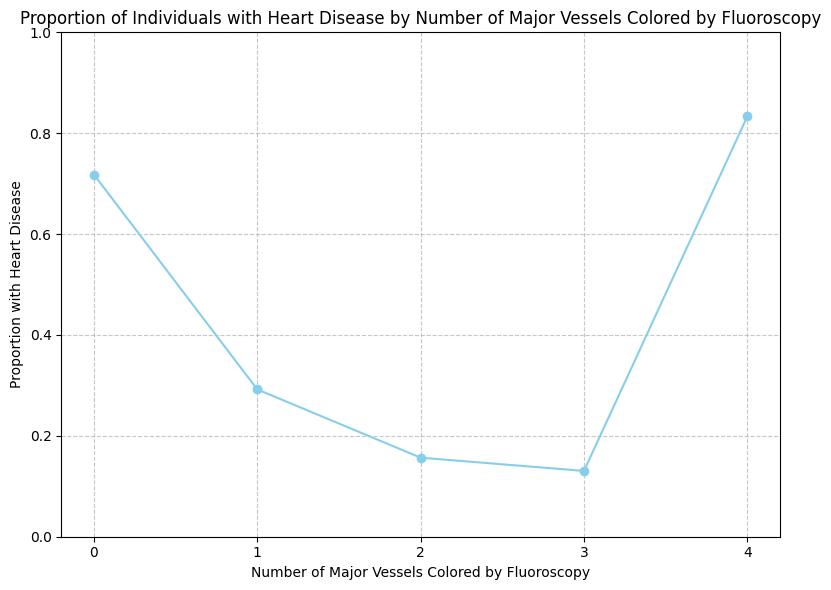

In [ ]:
#How does the number of major vessels colored by fluoroscopy (ca) relate to the presence of heart disease?
# Calculate the proportion of individuals with heart disease for each category of major vessels colored by fluoroscopy
proportion_with_heart_disease_by_ca = df.groupby('ca')['target'].mean()

#plot the chart
plt.figure(figsize=(8, 6))
plt.plot(proportion_with_heart_disease_by_ca.index, proportion_with_heart_disease_by_ca.values, marker='o', color='skyblue', linestyle='-')
plt.title('Proportion of Individuals with Heart Disease by Number of Major Vessels Colored by Fluoroscopy')
plt.xlabel('Number of Major Vessels Colored by Fluoroscopy')
plt.ylabel('Proportion with Heart Disease')
plt.xticks(proportion_with_heart_disease_by_ca.index)
plt.ylim(0, 1)  # Set y-axis limit to ensure proportion ranges from 0 to 1
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**conclusion**
The analysis of the provided dataset revealed notable trends regarding heart disease prevalence across different demographics. Males showed a higher prevalence of heart disease compared to females, with approximately [insert percentage]% of males affected compared to [insert percentage]% of females. calculating Heart disease rates, Heart disease by gender, by age. Performed EDA and visualizing through graphs.Correlation Analysis through Heatmap.